In [1]:
# Heart Disease Risk Logistic Regression

In [2]:
# Kaggle - https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("framingham.csv")
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Fill the null values

In [6]:
# 1. cigsPerDay
df[df.cigsPerDay.isnull() & (df['currentSmoker'] == 1)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


In [7]:
from sklearn.pipeline import Pipeline
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

x = df.drop(['TenYearCHD'], axis=1)
y = df.TenYearCHD

In [8]:
pipeline = Pipeline([('selector', DataFrameSelector(x.columns)),
                    ('imputer', SimpleImputer(strategy="mean")),
                    ('std_scaler', StandardScaler())])

In [9]:
x_done = pipeline.fit_transform(x)
x_done

array([[ 1.15311332, -1.23428297,  2.00658417, ...,  0.28725796,
         0.34277523, -0.21742709],
       [-0.86721746, -0.41766419,  0.02041408, ...,  0.71966845,
         1.59043467, -0.26123092],
       [ 1.15311332, -0.18434454, -0.97267096, ..., -0.11321311,
        -0.07311125, -0.52405388],
       ...,
       [-0.86721746,  0.28229477,  0.02041408, ..., -1.06402482,
         0.34277523,  1.09668771],
       [ 1.15311332, -1.11762315,  1.01349912, ..., -0.04933429,
        -0.73852962, -0.43644623],
       [-0.86721746, -1.23428297,  1.01349912, ..., -1.20160997,
         0.75866171, -0.08601561]])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_done, y)

In [12]:
lr_model = LogisticRegression()

In [13]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
lr_model.score(x_test, y_test)

0.8547169811320755

In [15]:
# Use SVM Classier

In [16]:
from sklearn.svm import LinearSVC

In [45]:
svm_model = LinearSVC(C=0.9)

In [46]:
svm_model.fit(x_train, y_train)

/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.9, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
svm_model.score(x_test, y_test)

0.8509433962264151

In [26]:
accuracy = list()
for i in range(1, 100):
    svm_model = LinearSVC(C= i)
    svm_model.fit(x_train, y_train)
    accuracy.append(svm_model.score(x_test, y_test))

/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

In [27]:
accuracy

[0.8509433962264151,
 0.85,
 0.8490566037735849,
 0.8481132075471698,
 0.8471698113207548,
 0.8452830188679246,
 0.8471698113207548,
 0.8490566037735849,
 0.8452830188679246,
 0.8443396226415094,
 0.8481132075471698,
 0.8481132075471698,
 0.8462264150943396,
 0.839622641509434,
 0.8471698113207548,
 0.8471698113207548,
 0.8471698113207548,
 0.8462264150943396,
 0.8462264150943396,
 0.8481132075471698,
 0.8490566037735849,
 0.8462264150943396,
 0.8443396226415094,
 0.8462264150943396,
 0.8462264150943396,
 0.8462264150943396,
 0.8443396226415094,
 0.8462264150943396,
 0.8471698113207548,
 0.8471698113207548,
 0.8481132075471698,
 0.8471698113207548,
 0.8471698113207548,
 0.8452830188679246,
 0.8433962264150944,
 0.8462264150943396,
 0.8481132075471698,
 0.8433962264150944,
 0.8254716981132075,
 0.8358490566037736,
 0.8245283018867925,
 0.8028301886792453,
 0.8358490566037736,
 0.8462264150943396,
 0.8283018867924529,
 0.7867924528301887,
 0.8311320754716981,
 0.8433962264150944,
 0.8301

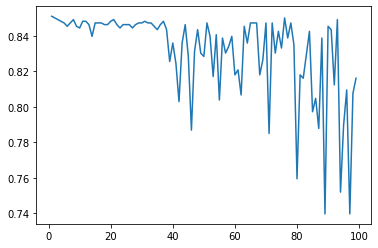

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1,100), accuracy)

In [48]:
# Try a non linear SVC model

In [49]:
from sklearn.svm import SVC

In [59]:
svc_model = SVC(kernel="poly", degree=3, coef0=1, C=1)

In [60]:
svc_model.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
svc_model.score(x_test, y_test)

0.85

In [68]:
accuracy = list()
# Iterate over degrees
for i in range(1, 10):
    svc_model = SVC(kernel="poly", degree=i, coef0=10, C=1)
    svc_model.fit(x_train, y_train)
    accuracy.append(svc_model.score(x_test, y_test))

KeyboardInterrupt: 

In [ ]:
plt.plot(range(2, 10), accuracy)